In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv('placement.csv')

In [10]:
df.shape

(1000, 3)

/tmp/ipython-input-3910714676.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["cgpa"])
/tmp/ipython-input-3910714676.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["placement_exam_marks"])


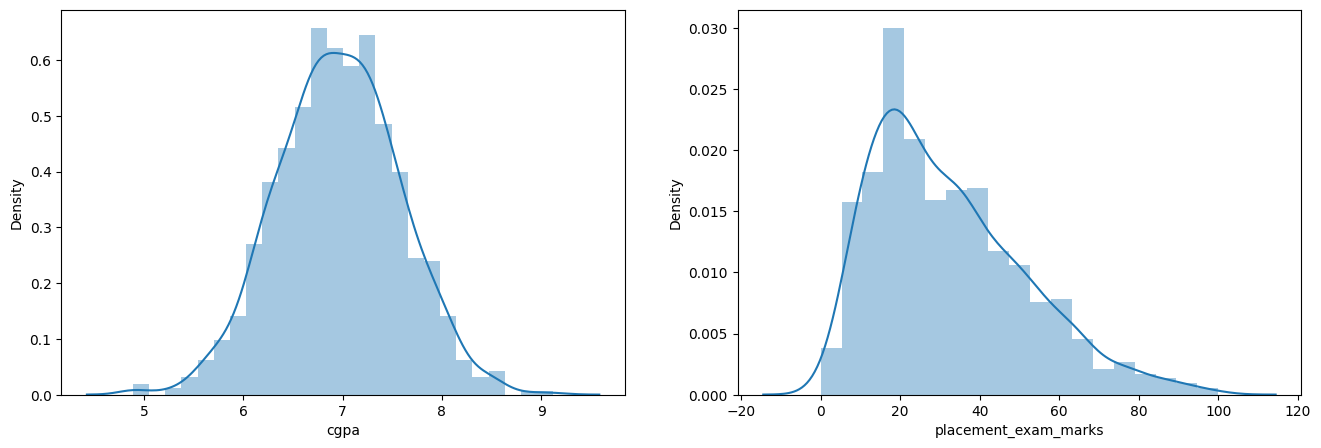

In [12]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df["cgpa"])

plt.subplot(1,2,2)
'sns.distplot(df["placement_exam_marks"])

plt.show()

In [14]:
print("mean value of cgpa",df["cgpa"].mean())
print("std value of cgpa",df["cgpa"].std())
print("min value of cgpa",df["cgpa"].min())
print("max value of cgpa",df["cgpa"].max())


mean value of cgpa 6.96124
std value of cgpa 0.6158978751323894
min value of cgpa 4.89
max value of cgpa 9.12


In [48]:
#finding the boundary values
print("highest allowed",df["cgpa"].mean()+3*df["cgpa"].std())
print("lowestprint allowed",df["cgpa"].mean()-3*df["cgpa"].std())

highest allowed 8.808933625397168
lowestprint allowed 5.113546374602832


In [28]:
new_df = df[(df["cgpa"] < 8.80) & (df["cgpa"] > 5.11)]
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


from matplotlib import pyplot as plt
new_df['cgpa'].plot(kind='hist', bins=20, title='cgpa')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
new_df['placement_exam_marks'].plot(kind='hist', bins=20, title='placement_exam_marks')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
new_df['placed'].plot(kind='hist', bins=20, title='placed')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
new_df.plot(kind='scatter', x='cgpa', y='placement_exam_marks', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
new_df.plot(kind='scatter', x='placement_exam_marks', y='placed', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
new_df['cgpa'].plot(kind='line', figsize=(8, 4), title='cgpa')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
new_df['placement_exam_marks'].plot(kind='line', figsize=(8, 4), title='placement_exam_marks')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
new_df['placed'].plot(kind='line', figsize=(8, 4), title='placed')
plt.gca().spines[['top', 'right']].set_visible(False)

In [36]:
#zscore=x-mew/sigma
df["cgpa_zscore"]=(df["cgpa"]-df["cgpa"].mean())/df["cgpa"].std()

In [31]:
df[df['cgpa_zscore']<-3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [34]:
df[(df["cgpa_zscore"] > 3)|(df["cgpa_zscore"] < -3)]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [53]:
upper_limit = df["cgpa"].mean()+3*df["cgpa"].std()
lower_limit = df["cgpa"].mean()-3*df["cgpa"].std()
print(upper_limit)
print(lower_limit)

8.808933625397168
5.113546374602832


In [58]:
df["cgpa"]=np.where(
    df["cgpa"]>upper_limit,
    upper_limit,
    np.where(
        df["cgpa"]<lower_limit,
        lower_limit,
        df["cgpa"]
    )
)
print(df)

         cgpa  placement_exam_marks  placed  cgpa_zscore
0    7.190000                  26.0       1     0.371425
1    7.460000                  38.0       1     0.809810
2    7.540000                  40.0       1     0.939701
3    6.420000                   8.0       1    -0.878782
4    7.230000                  17.0       0     0.436371
..        ...                   ...     ...          ...
995  8.808934                  44.0       1     3.099150
996  8.808934                  65.0       1     3.505062
997  5.113546                  34.0       0    -3.362960
998  8.620000                  46.0       1     2.693239
999  5.113546                  10.0       1    -3.346724

[1000 rows x 4 columns]


In [56]:
df.shape

(1000, 4)

In [57]:
df["cgpa"].describe()

,cgpa
count,1000.000000
mean,6.961499
std,0.612688
min,5.113546
25%,6.550000
50%,6.960000
75%,7.370000
max,8.808934
